In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
player_info=pd.read_csv("player-info.csv")
season_stats=pd.read_csv("season-stats.csv")


In [41]:
print("player_info_shape",player_info.shape)
print("season_info_shape",season_stats.shape)


player_info_shape (3922, 8)
season_info_shape (24691, 53)


In [42]:
player_info.head()

,Unnamed: 0,name,height,weight,college,birth_year,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [43]:
season_stats.head()

,id,year,name,pos,age,tm,g,gs,mp,per,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [44]:
player_info.drop('Unnamed: 0',axis=1,inplace=True)
player_info.head()

,name,height,weight,college,birth_year,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [45]:
player_info.set_index('name',inplace=True)
player_info.head()

,height,weight,college,birth_year,birth_city,birth_state
name,,,,,,
Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [46]:
complete_stats=season_stats.join(player_info,on='name')
complete_stats.head(3)

,id,year,name,pos,age,tm,g,gs,mp,per,...,blk,tov,pf,pts,height,weight,college,birth_year,birth_city,birth_state
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,217.0,458.0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,99.0,279.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,192.0,438.0,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN


In [47]:
trimmed_stats=complete_stats[complete_stats.year>=1990]
trimmed_stats.head()

,id,year,name,pos,age,tm,g,gs,mp,per,...,blk,tov,pf,pts,height,weight,college,birth_year,birth_city,birth_state
9547,9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,25.0,70.0,248.0,362.0,211.0,99.0,Oral Roberts University,1962.0,Inglewood,California
9548,9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,3.0,141.0,133.0,1221.0,178.0,73.0,Boston College,1963.0,Hartford,Connecticut
9549,9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,19.0,121.0,201.0,1099.0,198.0,105.0,DePaul University,1959.0,Chicago,Illinois
9550,9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,18.0,185.0,238.0,1342.0,193.0,79.0,Brigham Young University,1959.0,Eugene,Oregon
9551,9551,1990.0,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,...,39.0,101.0,219.0,860.0,203.0,98.0,Duke University,1963.0,Phoenix,Arizona


In [48]:
trimmed_stats.shape

(15117, 59)

In [49]:
trimmed_stats=trimmed_stats[['id','year','name','age','mp','fg','fga','3p','3pa','orb','ast','stl','blk','pts','height','weight']]
trimmed_stats.head()

,id,year,name,age,mp,fg,fga,3p,3pa,orb,ast,stl,blk,pts,height,weight
9547,9547,1990.0,Mark Acres,27.0,1691.0,138.0,285.0,3.0,4.0,154.0,67.0,36.0,25.0,362.0,211.0,99.0
9548,9548,1990.0,Michael Adams,27.0,2690.0,398.0,989.0,158.0,432.0,49.0,495.0,121.0,3.0,1221.0,178.0,73.0
9549,9549,1990.0,Mark Aguirre,30.0,2005.0,438.0,898.0,31.0,93.0,117.0,145.0,34.0,19.0,1099.0,198.0,105.0
9550,9550,1990.0,Danny Ainge,30.0,2727.0,506.0,1154.0,108.0,289.0,69.0,453.0,113.0,18.0,1342.0,193.0,79.0
9551,9551,1990.0,Mark Alarie,26.0,1893.0,371.0,785.0,10.0,49.0,151.0,142.0,60.0,39.0,860.0,203.0,98.0


In [50]:
trimmed_stats.isnull().sum()

id        0
year      0
name      0
age       0
mp        0
fg        0
fga       0
3p        0
3pa       0
orb       0
ast       0
stl       0
blk       0
pts       0
height    0
weight    0
dtype: int64

In [51]:

trimmed_stats=trimmed_stats.dropna(how='any')
trimmed_stats.head()

,id,year,name,age,mp,fg,fga,3p,3pa,orb,ast,stl,blk,pts,height,weight
9547,9547,1990.0,Mark Acres,27.0,1691.0,138.0,285.0,3.0,4.0,154.0,67.0,36.0,25.0,362.0,211.0,99.0
9548,9548,1990.0,Michael Adams,27.0,2690.0,398.0,989.0,158.0,432.0,49.0,495.0,121.0,3.0,1221.0,178.0,73.0
9549,9549,1990.0,Mark Aguirre,30.0,2005.0,438.0,898.0,31.0,93.0,117.0,145.0,34.0,19.0,1099.0,198.0,105.0
9550,9550,1990.0,Danny Ainge,30.0,2727.0,506.0,1154.0,108.0,289.0,69.0,453.0,113.0,18.0,1342.0,193.0,79.0
9551,9551,1990.0,Mark Alarie,26.0,1893.0,371.0,785.0,10.0,49.0,151.0,142.0,60.0,39.0,860.0,203.0,98.0


In [52]:
trimmed_stats.isnull().sum()

id        0
year      0
name      0
age       0
mp        0
fg        0
fga       0
3p        0
3pa       0
orb       0
ast       0
stl       0
blk       0
pts       0
height    0
weight    0
dtype: int64

Parallieze player name 

In [53]:
stats_with_names=trimmed_stats.copy()
player_name = trimmed_stats[["id","name"]]
trimmed_stats.drop(axis=1,labels=["name"],inplace= True)
trimmed_stats

,id,year,age,mp,fg,fga,3p,3pa,orb,ast,stl,blk,pts,height,weight
9547,9547,1990.0,27.0,1691.0,138.0,285.0,3.0,4.0,154.0,67.0,36.0,25.0,362.0,211.0,99.0
9548,9548,1990.0,27.0,2690.0,398.0,989.0,158.0,432.0,49.0,495.0,121.0,3.0,1221.0,178.0,73.0
9549,9549,1990.0,30.0,2005.0,438.0,898.0,31.0,93.0,117.0,145.0,34.0,19.0,1099.0,198.0,105.0
9550,9550,1990.0,30.0,2727.0,506.0,1154.0,108.0,289.0,69.0,453.0,113.0,18.0,1342.0,193.0,79.0
9551,9551,1990.0,26.0,1893.0,371.0,785.0,10.0,49.0,151.0,142.0,60.0,39.0,860.0,203.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,24.0,1725.0,253.0,443.0,0.0,1.0,135.0,99.0,62.0,58.0,639.0,213.0,108.0
24687,24687,2017.0,27.0,525.0,78.0,158.0,0.0,1.0,43.0,42.0,7.0,21.0,178.0,213.0,114.0
24688,24688,2017.0,20.0,108.0,10.0,31.0,0.0,0.0,11.0,4.0,2.0,5.0,23.0,213.0,108.0
24689,24689,2017.0,22.0,843.0,88.0,221.0,33.0,99.0,15.0,36.0,15.0,16.0,240.0,203.0,97.0


In [54]:
periodic_stats = trimmed_stats.groupby("year").mean().reset_index()
periodic_stats = periodic_stats.drop(labels = "id", axis=1)

In [55]:
periodic_stats.head()

,year,age,mp,fg,fga,3p,3pa,orb,ast,stl,blk,pts,height,weight
0,1990.0,26.773420,1245.945534,212.429194,447.612200,11.002179,33.466231,71.043573,128.555556,44.132898,26.185185,546.993464,199.699346,93.335512
1,1991.0,26.852608,1282.226757,220.555556,464.990930,12.034014,37.612245,74.750567,128.727891,45.451247,27.614512,566.308390,200.213152,94.405896
2,1992.0,26.759825,1215.148472,205.914847,436.884279,12.524017,38.063319,71.613537,123.600437,43.502183,27.469432,525.275109,199.347162,93.862445
3,1993.0,27.015590,1233.396437,206.579065,436.739421,15.224944,45.398664,70.670379,125.015590,43.692650,26.576837,534.447661,200.167038,95.590200
4,1994.0,27.108108,1182.307692,193.126819,415.392931,15.896050,47.881497,68.137214,118.064449,43.407484,25.409563,497.937630,200.862786,96.058212


In [56]:
max_height_ids = trimmed_stats[trimmed_stats.height == trimmed_stats.height.max()]["id"]
names = player_name[player_name.id.isin(max_height_ids)]
names = names.drop_duplicates(keep = "first", subset='name')
names = trimmed_stats.merge(names, on='id')[["name","height"]]
print("these are the tallest players since 1990")
print(names)
print()

these are the tallest players since 1990
               name  height
0        Manute Bol   231.0
1  Gheorghe Muresan   231.0



In [57]:
min_height_ids = trimmed_stats[trimmed_stats.height == trimmed_stats.height.min()]["id"]
names = player_name[player_name.id.isin(min_height_ids)]
names = names.drop_duplicates(keep = "first", subset='name')
names = trimmed_stats.merge(names, on='id')[["name","height"]]
print("these are the shortest players since 1990")
print(names)
print()

these are the shortest players since 1990
            name  height
0  Muggsy Bogues   160.0



In [58]:
print("The average height of nba players since 1990 is", trimmed_stats["height"].mean(),"cm")

The average height of nba players since 1990 is 200.2841833697162 cm


In [59]:
#The oldest players since 1990
#The youngest players since 1990
#The average age of players since 1990
max_age_ids = trimmed_stats[trimmed_stats.age == trimmed_stats.age.max()]["id"]
names = player_name[player_name.id.isin(max_age_ids)]
names = names.drop_duplicates(keep = "first", subset='name')
names = trimmed_stats.merge(names, on='id')[["name","age"]]
print("The oldest players since 1990")
print(names)
print()
print("The average number of points in a season since 1990 is: ", trimmed_stats["age"].mean(), "points")

The oldest players since 1990
           name   age
0  Kevin Willis  44.0

The average number of points in a season since 1990 is:  26.980419395382683 points


In [60]:
min_age_ids = trimmed_stats[trimmed_stats.age == trimmed_stats.age.min()]["id"]
names = player_name[player_name.id.isin(min_age_ids)]
names = names.drop_duplicates(keep = "first", subset='name')
names = trimmed_stats.merge(names, on='id')[["name","age"]]
print("The younest players since 1990")
print(names)
print()

The younest players since 1990
                name   age
0        Kobe Bryant  18.0
1    Jermaine O'Neal  18.0
2      Tracy McGrady  18.0
3      Al Harrington  18.0
4       Bruno Sundov  18.0
5       Maciej Lampe  18.0
6      Darko Milicic  18.0
7    Andris Biedrins  18.0
8       Andrew Bynum  18.0
9       Amir Johnson  18.0
10  Yaroslav Korolev  18.0
11        C.J. Miles  18.0



In [61]:
max_points_ids = trimmed_stats[trimmed_stats.pts == trimmed_stats.pts.max()]["id"]
names = player_name[player_name.id.isin(max_points_ids)]
names = names.drop_duplicates(keep = "first", subset='name')
names = trimmed_stats.merge(names, on='id')[["name","height"]]
print("The most points scored in an NBA season since 1990 was: ")
print(names)
print()

min_points_ids = trimmed_stats[trimmed_stats.pts == trimmed_stats.pts.min()]["id"]
names = player_name[player_name.id.isin(min_points_ids)]
names = names.drop_duplicates(keep = "first", subset='name')
names = trimmed_stats.merge(names, on='id')[["name","height"]]
print("There were ", names.size/2, "players who scored 0 points in a season since 1990")
print()
print("The average number of points in a season since 1990 is: ", trimmed_stats["pts"].mean(), "points")

The most points scored in an NBA season since 1990 was: 
          name  height
0  Kobe Bryant   198.0

There were  186.0 players who scored 0 points in a season since 1990

The average number of points in a season since 1990 is:  463.05867566316067 points


[]

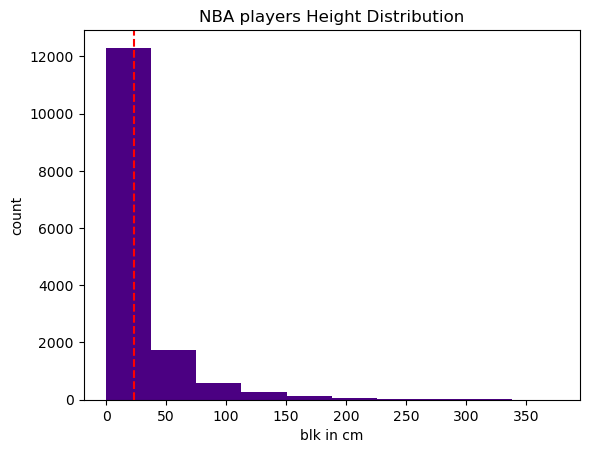

In [62]:
#Do the same for Blocks(take reference from points)
plt.hist(trimmed_stats["blk"],color="indigo")
plt.title("NBA players Height Distribution")
plt.xlabel("blk in cm")
plt.ylabel("count")
plt.axvline(trimmed_stats["blk"].mean(), color = "r", linestyle= "dashed")
plt.plot()

[]

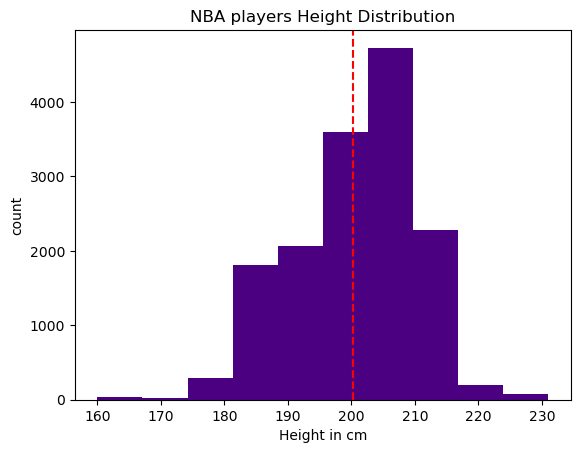

In [63]:
plt.hist(trimmed_stats["height"],color="indigo")
plt.title("NBA players Height Distribution")
plt.xlabel("Height in cm")
plt.ylabel("count")
plt.axvline(trimmed_stats["height"].mean(), color = "r", linestyle= "dashed")
plt.plot()

[]

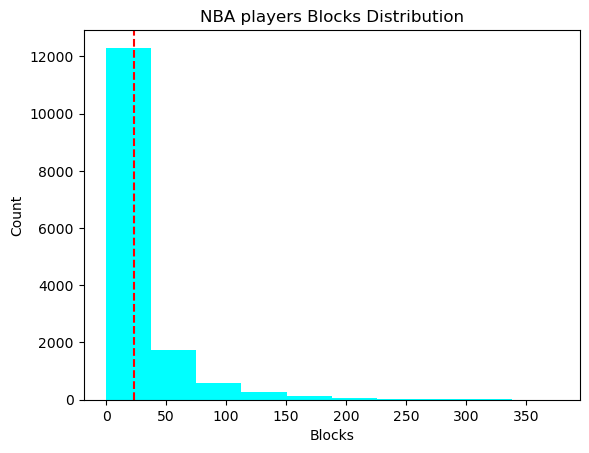

In [64]:
plt.hist(trimmed_stats["blk"],color="aqua")
plt.title("NBA players Blocks Distribution")
plt.xlabel("Blocks")
plt.ylabel("Count")
plt.axvline(trimmed_stats["blk"].mean(), color = "r", linestyle= "dashed")
plt.plot()

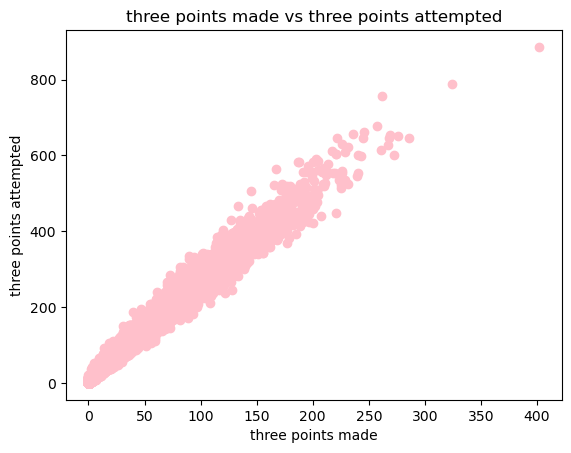

Average three points made is:  26.459615002976783
Average three points attempts is:  74.96328636634253


In [65]:
plt.plot(trimmed_stats["3p"], trimmed_stats["3pa"], "o", color="pink")
plt.title("three points made vs three points attempted")
plt.xlabel("three points made")
plt.ylabel("three points attempted")
plt.show()
print("Average three points made is: ", trimmed_stats["3p"].mean())
print("Average three points attempts is: ", trimmed_stats["3pa"].mean())

Analysis

Linear System Equations

In [66]:
a = trimmed_stats.drop(labels = "age", axis=1)
b = trimmed_stats.age
x = np.linalg.lstsq(a,b)
x[0]

array([-7.37303152e-05,  9.89215064e-03,  2.32265708e-03,  7.55976182e-03,
       -5.90171719e-03,  3.64648954e-02, -1.28515634e-02, -6.60846153e-03,
        2.39716956e-03, -1.69157530e-02, -6.22937659e-03, -1.25333940e-03,
        6.26456806e-02, -4.44944605e-02])

From the solotion vector we can see that age has a small effect on a players stats

# Interpolation

Least Square

Lets take Independent Variables (age, height, weight)
Dependent (points, minutes played, total rebounds, steals)


Age Vs Points

In [67]:
x = trimmed_stats.age
y = trimmed_stats.pts

A = np.vstack([x, np.ones(len(x))]).T
m , c = np.linalg.lstsq(A, y)[0]
print("Slope", m)


Slope -0.9368231752896717


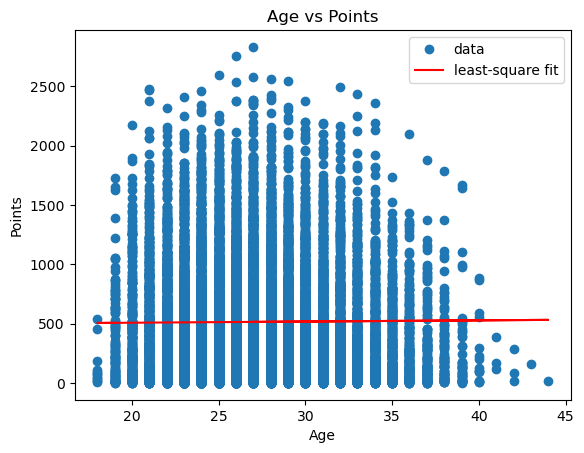

In [68]:
plt.plot(x,y, 'o', label = "data")
plt.plot(x, m + x + c, 'r', label='least-square fit')
plt.xlabel("Age")
plt.ylabel("Points")
plt.title("Age vs Points")
plt.legend()
plt.show()

Age vs Minute Played

In [69]:
x = trimmed_stats.age
y = trimmed_stats.mp

A = np.vstack([x, np.ones(len(x))]).T
m , c = np.linalg.lstsq(A, y)[0]
print("Slope", m)

Slope 6.803777922506127


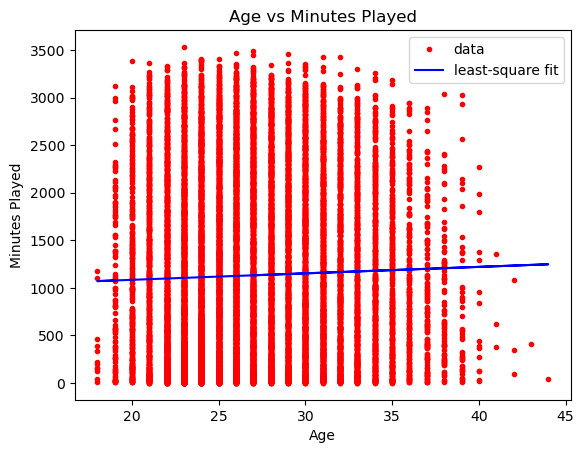

In [70]:
plt.plot(x,y, '.', label = "data", color = "red")
plt.plot(x, m * x + c, 'r', label = 'least-square fit', color= "blue")
plt.xlabel("Age")
plt.ylabel("Minutes Played")
plt.title("Age vs Minutes Played")
plt.legend()
plt.show()

Height Vs Rebound

In [71]:
x = trimmed_stats.height
y = trimmed_stats.orb

A = np.vstack([x, np.ones(len(x))]).T
m , c = np.linalg.lstsq(A, y)[0]
print("Slope", m)

Slope 2.205258728944857


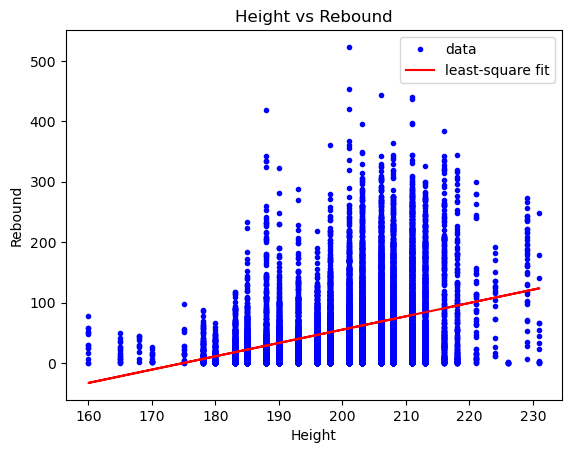

In [72]:
plt.plot(x,y, '.', label = "data", color = "blue")
plt.plot(x, m * x + c, 'r', label = 'least-square fit', color= "red")
plt.xlabel("Height")
plt.ylabel("Rebound")
plt.title("Height vs Rebound")
plt.legend()
plt.show()

Height Vs 3 points percentage

In [88]:
good_3pa_players = trimmed_stats [trimmed_stats ["3pa"] > 10]
x = good_3pa_players.height
y = good_3pa_players["3p"] / good_3pa_players["3pa"]

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]

print("Slope: ", m)
print("Intercept: ", c)

Slope:  -0.0005185303564931292
Intercept:  0.42733202641708434


Fourrir Analysis (FFT = Fast Frequency) (Making Periodogram using NyQuist Frequency)

In [104]:
def make_periodogram(attr, color, title_attr):
    """Constructs a periodogram for a given attribute of trimmed_stats"""
    
    # Perform FFT
    Y = np.fft.fft(trimmed_stats[attr])
    
    # Calculate power and frequency 
    n = len(Y)
    power = np.abs(Y[1 : np.floor(n / 2).astype(int)])
    nyquist = 1/2;
    freq = np.arange(1, np.floor(n / 2).astype(int)) / (n / 2) * nyquist
    
    # Plot the periodogram 
    plt.plot(freq, power, color=color)
    plt.title("Periodogram of Average Player " + title_attr)
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    
    from scipy.signal import argrelextrema
    rel_extrema = argrelextrema(power, np.greater, order=np.floor(n / 25).astype(int))
    for i in rel_extrema[0]:
        plt.plot(freq[i], power[i], 'o', color="orange")
    
    plt.show()


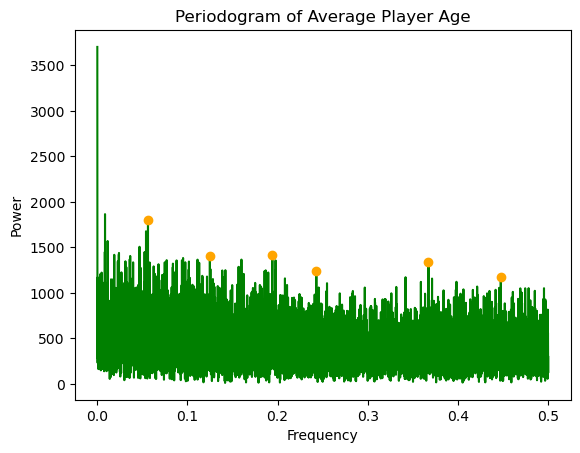

In [105]:
make_periodogram("age", "green", "Age")